In [11]:
import findspark, pyspark, pandas
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, min, max, avg, lit, mean

findspark.init()

session = SparkSession.builder.master('local[*]'). \
    appName('Practice').getOrCreate()

# Esquema
data_schema = [
    StructField('_c0', IntegerType(), True),
    StructField('symbol', StringType(), True),
    StructField('data', DateType(), True),
    StructField('open', DoubleType(), True),
    StructField('high', DoubleType(), True),
    StructField('low', DoubleType(), True),
    StructField('close', DoubleType(), True),
    StructField('volume', IntegerType(), True),
    StructField('adjusted', DoubleType(), True),
    StructField('market.cap', StringType(), True),
    StructField('sector', StringType(), True),
    StructField('industry', StringType(), True),
    StructField('exchange', StringType(), True),
]

data_schema = StructType(fields=data_schema)

# Lectura
stocks_df = session.read.csv(
    path=r'data/stocks_price_final.csv',
    header=True,
    schema=data_schema,
    sep=',',
)


             _c0 symbol        data       open       high        low  \
0              1    TXG  2019-09-12  54.000000  58.000000  51.000000   
1              2    TXG  2019-09-13  52.750000  54.355000  49.150002   
2              3    TXG  2019-09-16  52.450001  56.000000  52.009998   
3              4    TXG  2019-09-17  56.209999  60.900002  55.423000   
4              5    TXG  2019-09-18  56.849998  62.270000  55.650002   
...          ...    ...         ...        ...        ...        ...   
1729029  1729030   ZYME  2020-07-16  30.570000  31.670000  30.299999   
1729030  1729031   ZYME  2020-07-17  31.200001  33.080002  31.000000   
1729031  1729032   ZYME  2020-07-20  33.320000  33.320000  31.589001   
1729032  1729033   ZYME  2020-07-21  32.369999  32.490002  30.340000   
1729033  1729034   ZYME  2020-07-22  30.799999  32.119999  30.520000   

             close     volume   adjusted market_cap         sector  \
0        52.750000  7326300.0  52.750000     $9.31B  Capital Good

In [ ]:
# - Eliminar o renombrar la variable market.cap
# stocks_df = stocks_df.drop('market.cap')
stocks_df = stocks_df.withColumnRenamed('market.cap', 'market_cap')

In [ ]:
# - Filtrar los datos donde el valor de "open" es nulo y eliminar esas filas
stocks_df_open_is_null = stocks_df.dropna(subset='open')

In [12]:
# - Calcular el mínimo y máximo de open, close y adjusted
stocks_df_min_max = stocks_df.agg(
    min('open').alias('open_min'),
    max('open').alias('open_max'),
    min('close').alias('close_min'),
    max('close').alias('close_max'),
    min('adjusted').alias('adjusted_min'),
    max('adjusted').alias('adjusted_max'),
)

In [ ]:
# - Convertir un DataFrame de Spark en un DataFrame de pandas
stocks_df_pandas_df = stocks_df.toPandas()

In [20]:
# - Calcular la media de las variables open, close y adjusted por industria
stocks_df_avg_industry = stocks_df.groupBy('industry').agg(
    avg('open').alias('open_avg'),
    avg('close').alias('close_avg'),
    avg('adjusted').alias('adjusted_avg'),
)

                                              industry   open_avg
0                           Finance/Investors Services   5.134402
1                                        Miscellaneous  16.385883
2    Biotechnology: Biological Products (No Diagnos...  24.808083
3                               Other Specialty Stores  84.807188
4    Biotechnology: Electromedical & Electrotherape...  33.368917
..                                                 ...        ...
130                             Wholesale Distributors  16.608839
131                           Electronics Distribution   6.428699
132                                     Tools/Hardware  70.412755
133                                            Tobacco  32.467832
134    General Bldg Contractors - Nonresidential Bldgs  13.528546

[135 rows x 2 columns]


<Axes: xlabel='industry'>

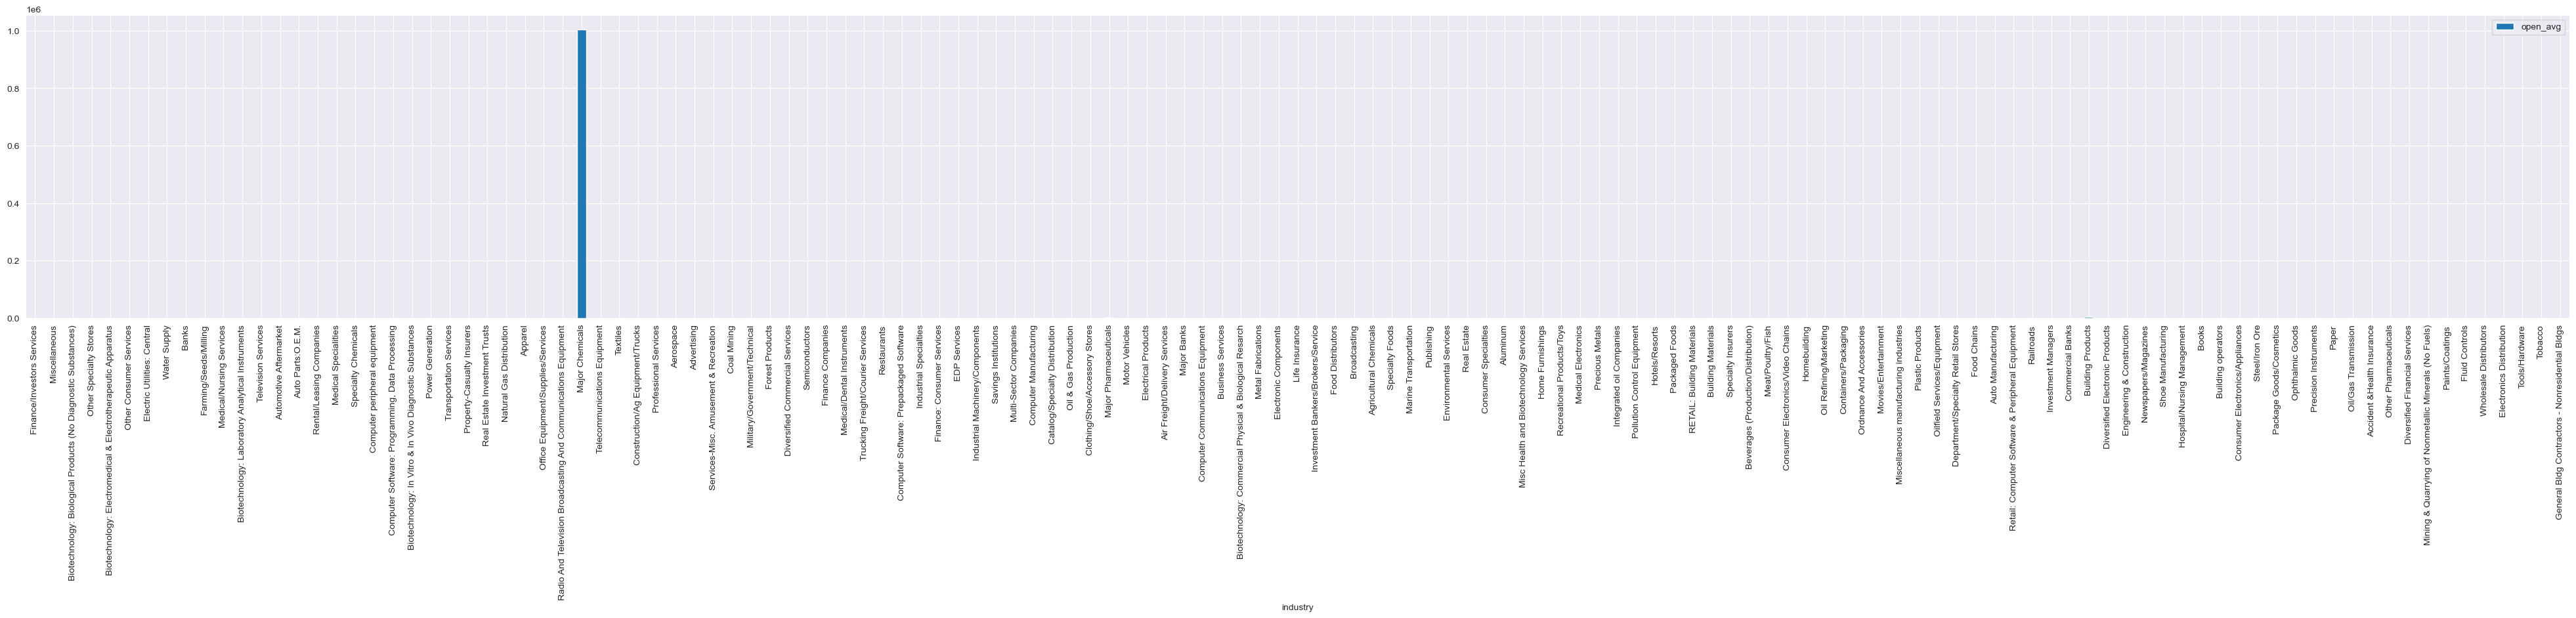

In [18]:
# - Generar un gráfico de líneas donde se muestre la media de open por industria
stocks_df_open_avg_industry_pandas = stocks_df.groupBy('industry').agg(
    avg('open').alias('open_avg'),
).toPandas()

stocks_df_open_avg_industry_pandas.plot(
    kind='bar',
    x='industry',
    y='open_avg', figsize=(12, 6)
)

C:\Users\jaime\AppData\Local\Temp\ipykernel_12692\627543204.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=stocks_df_avg_industry.toPandas().corr(),


<Axes: >

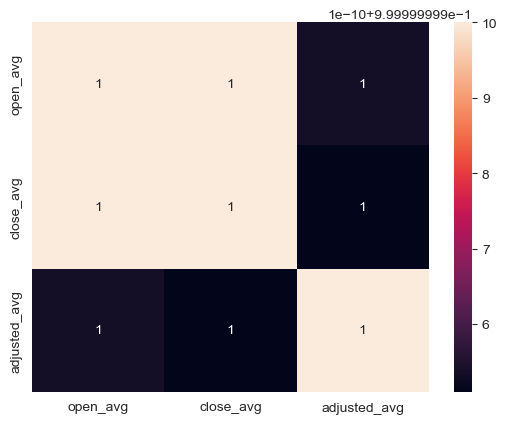

In [23]:
# - Generar un heatmap con seaborn donde se muestre la correlación entre las medias de open, close y adjusted
import seaborn

seaborn.heatmap(
    data=stocks_df_avg_industry.toPandas().corr(),
    annot=True,
)

In [25]:
# - Guardar en un archivo parquet una selección de datos
stocks_df.select(['open', 'close', 'adjusted']).write.save(
    'stocks_data.parquet', format='parquet'
)

AnalysisException: path file:/B:/OneDrive/Coding/Python/Courses/PySpark/big-data-apache-spark-3-python-cero-experto/Fundamentos de Apache Spark/stocks_data.parquet already exists.